In [1]:
import pandas as pd
import numpy as np
from sklearn import cross_validation, metrics 
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.matrix as smatrix
import random
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/fartuk/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
transactions = pd.read_csv('transactions.csv')
customers_gender = pd.read_csv('customers_gender_train.csv')

In [6]:
customers_gender[:4]

,customer_id,gender
0,75562265,0
1,10928546,1
2,69348468,1
3,84816985,1


In [9]:
transactions['day'] = transactions.tr_datetime.apply(lambda dt: dt.split()[0]).astype(int)
transactions[:5]

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,day
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN,0
1,39026145,1 10:19:29,6011,7010,56147.89,NaN,1
2,39026145,1 10:20:56,4829,2330,-56147.89,NaN,1
3,39026145,1 10:39:54,5499,1010,-1392.47,NaN,1
4,39026145,2 15:33:42,5499,1010,-920.83,NaN,2


In [10]:
H = transactions.groupby('mcc_code') \
                    .apply(lambda x: x[['tr_type']].unstack().value_counts()) \
                    .unstack() \
                    .fillna(0)

In [24]:
H = log(H)
H[:5]

,1000,1010,1030,1100,1110,1200,1210,1310,1410,1510,...,7040,7041,7044,7070,7071,7074,7075,8100,8145,8146
mcc_code,,,,,,,,,,,,,,,,,,,,,
742,NaN,1.113344,NaN,NaN,1.707916,NaN,0.475885,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1711,NaN,0.094048,NaN,-inf,1.539753,NaN,-0.366513,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1731,NaN,1.468751,NaN,NaN,0.326634,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1799,NaN,0.326634,NaN,-inf,1.549588,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2741,NaN,NaN,NaN,1.019781,1.142787,0.874591,-0.366513,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


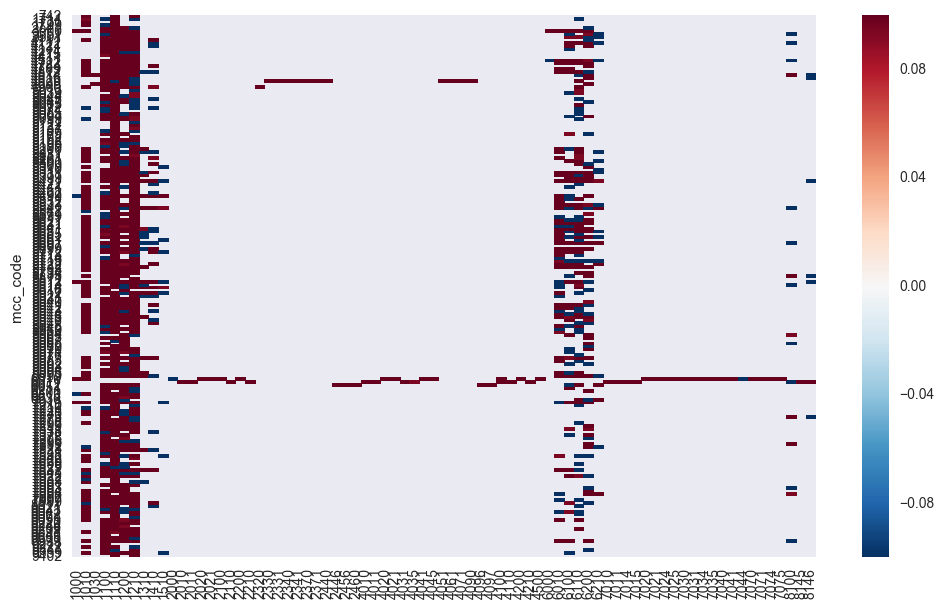

In [28]:
pylab.figure(figsize=(12, 7))
sns.heatmap(H, annot=False)

In [5]:
transactions.mcc_code.unique()

array([4814, 6011, 4829, 5499, 5541, 5200, 5732, 6010, 5331, 5912, 5411,
       5812, 6012, 5719, 5722, 5621, 5814, 5921, 5941, 5691, 5813, 5211,
       4812, 5945, 5983, 5999, 5943, 5533, 6300, 7832, 8099, 5992, 3501,
       6536, 7997, 5641, 4722, 5661, 5651, 7011, 5699, 5942, 7298, 7999,
       5712, 5511, 5422, 5399, 4900, 7538, 5949, 5977, 5948, 5631, 5311,
       5462, 4112, 8999, 8021, 5714, 5251, 4789, 7542, 5947, 3000, 8043,
       5944, 5734, 5611, 5532, 4816, 7311, 5655, 6051, 7994, 5995, 5309,
       5964, 8299, 8244, 4111, 4511, 9399, 5441, 7922, 5261, 7699, 7995,
       7629, 5816, 5735, 5039, 5300, 5199, 4121, 5065, 7399, 7299, 8011,
       7230, 9222, 5946, 5131, 5994, 5231, 8071, 5094, 5047, 5072, 7210,
       5976, 5045, 7932, 4215, 5542, 5099, 5713, 4899, 7933, 5681, 5193,
       1711, 6211, 8398, 5599, 5993, 8062, 5169, 4214, 5733, 5013, 7221,
       5571, 7993, 5971, 5968, 7372, 5074, 5044, 5811, 5111, 8641, 7512,
       7523, 9311, 8220, 7991, 7996, 4784, 5931, 78

In [6]:
transactions.tr_type.unique()

array([1030, 7010, 2330, 1010, 2010, 7020, 1110, 6110, 7014, 1100, 2020,
       2370, 7070, 7030, 7071, 2331, 4051, 6010, 2011, 4011, 4010, 2320,
       2371, 4071, 4110, 2110, 2460, 1200, 2440, 4090, 1210, 7021, 7031,
       6200, 6100, 7074, 4041, 4210, 2210, 7011, 4021, 2021, 7040, 2340,
       4031, 7034, 7035, 1410, 1310, 2456, 4097, 6000, 2100, 4100, 4500,
       4061, 2341, 7024, 4020, 8145, 1510, 7075, 4200, 2200, 7041, 1000,
       7015, 8146, 6210, 2446, 4096, 8100, 7025, 4045, 4035, 7044, 2000])

In [30]:
X = transactions.groupby('customer_id') \
                    .apply(lambda x: x[['tr_type']].unstack().value_counts()) \
                    .unstack() \
                    .fillna(0)

In [31]:
Y = transactions.groupby('customer_id') \
                    .apply(lambda x: x[['mcc_code']].unstack().value_counts()) \
                    .unstack() \
                    .fillna(0)

In [32]:
def sum_pos(x):
    sum1 = 0
    for i in x:
        if i > 0:
            sum1 = sum1 + i
    return sum1

In [33]:
def sum_neg(x):
    sum1 = 0
    for i in x:
        if i < 0:
            sum1 = sum1 + i
    return sum1

In [34]:
def ave_pos(x):
    sum1 = 0
    num = 1
    for i in x:
        if i > 0:
            sum1 = sum1 + i
            num = num + 1
    if num == 0:
        t = 0
    else:
        t = float(sum1 / num)
    return t

In [35]:
def ave_neg(x):
    sum1 = 0
    num = 1
    for i in x:
        if i < 0:
            sum1 = sum1 + i
            num = num + 1
    if num == 0:
        t = 0
    else:
        t = float(sum1 / num)
    return t

In [36]:
Z1 = transactions.groupby('customer_id')['amount'].apply(lambda x: sum_pos(x))
Z2 = transactions.groupby('customer_id')['amount'].apply(lambda x: sum_neg(x))

In [37]:
Z1 = pd.DataFrame(Z1)
Z2 = pd.DataFrame(Z2)
Z1.columns = ['sum_pos']
Z2.columns = ['sum_neg']

In [38]:
Z3 = transactions.groupby('customer_id')['amount'].apply(lambda x: x.max())
Z4 = transactions.groupby('customer_id')['amount'].apply(lambda x: x.min())

In [39]:
Z5 = transactions.groupby('customer_id')['amount'].apply(lambda x: ave_pos(x))
Z6 = transactions.groupby('customer_id')['amount'].apply(lambda x: ave_neg(x))

In [40]:
Z3 = pd.DataFrame(Z3)
Z4 = pd.DataFrame(Z4)
Z3.columns = ['max']
Z4.columns = ['min']

Z5 = pd.DataFrame(Z5)
Z6 = pd.DataFrame(Z6)
Z5.columns = ['ave_pos']
Z6.columns = ['ave_neg']

In [41]:
X = pd.concat([X, Y],axis=1)

In [42]:
X = pd.concat([X, Z1],axis=1)

In [43]:
X = pd.concat([X, Z2],axis=1)

In [44]:
X = pd.concat([X, Z3],axis=1)

In [45]:
X = pd.concat([X, Z4],axis=1)

In [46]:
X = pd.concat([X, Z5],axis=1)
X = pd.concat([X, Z6],axis=1)

In [47]:
X[:5]

,1000,1010,1030,1100,1110,1200,1210,1310,1410,1510,...,9222,9311,9399,9402,sum_pos,sum_neg,max,min,ave_pos,ave_neg
customer_id,,,,,,,,,,,,,,,,,,,,,
6815,0.0,42.0,90.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2706553.10,-3956007.97,2470507.35,-224591.58,386650.442857,-17900.488552
22899,0.0,6.0,47.0,0.0,27.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5818923.05,-6448719.64,875907.15,-868607.92,84332.218116,-38615.087665
27914,0.0,0.0,58.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,409879.70,-3386906.52,89836.63,-462658.65,11385.547222,-43985.798961
28753,0.0,89.0,25.0,3.0,65.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,45707408.97,-72253691.83,3099363.77,-3244539.76,896223.705294,-294913.027878
31385,0.0,75.0,125.0,0.0,75.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1251334.45,-3431338.03,199886.50,-364366.15,52138.935417,-10003.900962


In [48]:
del Z1
del Z2
del Z3
del Z4
del Y
import gc
gc.collect()

762

In [49]:
customers_gender = customers_gender.set_index('customer_id')

In [50]:
customers_gender[:3]

,gender
customer_id,
75562265,0
10928546,1
69348468,1


In [51]:
Y_train = customers_gender.loc[X.index].gender

In [52]:
Y_train = pd.DataFrame(Y_train)

In [53]:
mask = pd.isnull(Y_train)

In [60]:
for_del = []
for i in mask.index:
    if mask.ix[i, 0] == False:
        for_del += [i]

In [61]:
X_train = X.ix[for_del, :]

In [62]:
X_train[:10]

,1000,1010,1030,1100,1110,1200,1210,1310,1410,1510,...,9222,9311,9399,9402,sum_pos,sum_neg,max,min,ave_pos,ave_neg
customer_id,,,,,,,,,,,,,,,,,,,,,
6815,0.0,42.0,90.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2706553.10,-3956007.97,2470507.35,-224591.58,386650.442857,-17900.488552
22899,0.0,6.0,47.0,0.0,27.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5818923.05,-6448719.64,875907.15,-868607.92,84332.218116,-38615.087665
27914,0.0,0.0,58.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,409879.70,-3386906.52,89836.63,-462658.65,11385.547222,-43985.798961
28753,0.0,89.0,25.0,3.0,65.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,45707408.97,-72253691.83,3099363.77,-3244539.76,896223.705294,-294913.027878
31385,0.0,75.0,125.0,0.0,75.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1251334.45,-3431338.03,199886.50,-364366.15,52138.935417,-10003.900962
38084,0.0,271.0,291.0,4.0,76.0,1.0,63.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,26362447.14,-28333044.22,1235253.67,-1142759.68,229238.670783,-33770.016949
42096,0.0,299.0,94.0,50.0,83.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,10614338.62,-16143764.10,673774.73,-337785.73,158422.964478,-18534.746383
49793,0.0,287.0,81.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,613135.03,-25142418.66,112295.79,-673774.73,23582.116538,-51415.989080
50940,0.0,9.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,53901.96,-1763649.22,4491.83,-110049.87,4146.304615,-16482.702991


In [63]:
Y_train = Y_train.dropna()

In [64]:
Y_train[:5]

,gender
customer_id,
6815,0.0
22899,1.0
27914,1.0
28753,0.0
31385,0.0


## просто графики

In [65]:
women = []
men = []
for c in Y_train.index.values:
    if Y_train.ix[c, 0] == 0:
        women += [c]
    else:
        men += [c]


In [76]:
men_mcc = []
M = X_train.ix[men, :]
for c in M:
    men_mcc += [M[c].sum()]
men_mcc = men_mcc[:261]

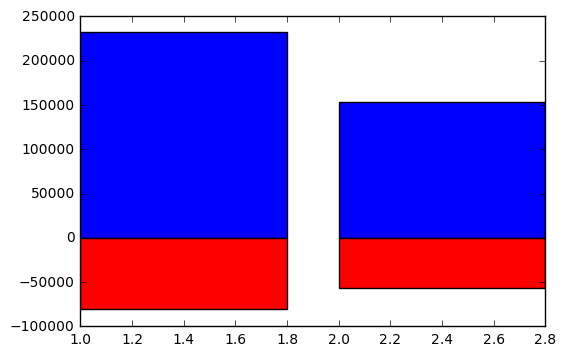

In [194]:
s1 = (X_train.ix[men, 'ave_pos']).mean()
s2 = (X_train.ix[women, 'ave_pos']).mean()
s3 = (X_train.ix[men, 'ave_neg']).mean()
s4 = (X_train.ix[women, 'ave_neg']).mean()
plt.bar([1, 2], [s1, s2])
plt.bar([1, 2], [s3, s4], color = "red")
plt.show()


/home/fartuk/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  from ipykernel import kernelapp as app


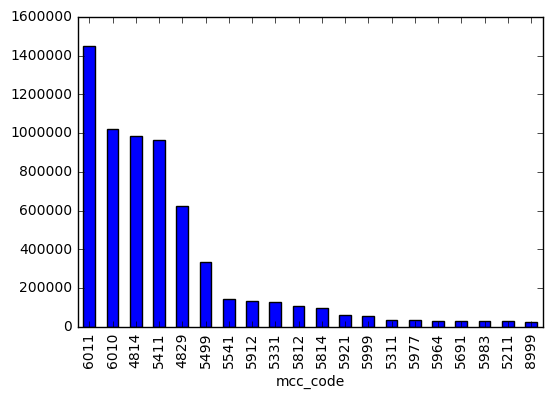

In [178]:
Z1 = transactions.groupby('mcc_code')['amount'].count()
Z1.sort('count', ascending = False)
Z1[:20].plot(kind = "bar")
plt.show()

/home/fartuk/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  from ipykernel import kernelapp as app


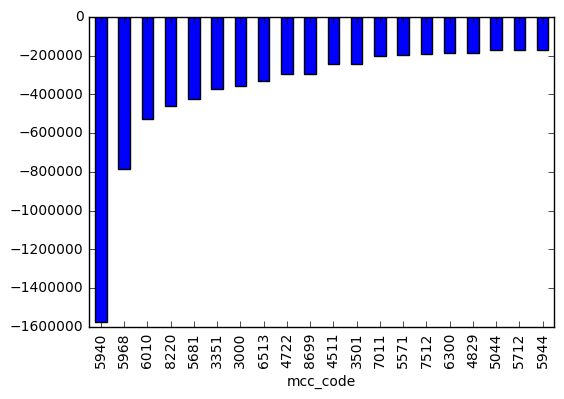

In [210]:
Z1 = transactions.groupby('mcc_code')['amount'].apply(lambda x: ave_neg(x))
Z1.sort(ascending = True)
Z1[:20].plot(kind = "bar")
plt.show()

/home/fartuk/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  from ipykernel import kernelapp as app


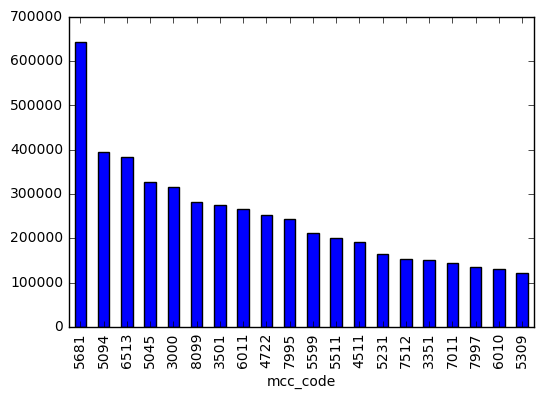

In [212]:
Z1 = transactions.groupby('mcc_code')['amount'].apply(lambda x: ave_pos(x))
Z1.sort(ascending = False)
Z1[:20].plot(kind = "bar")
plt.show()

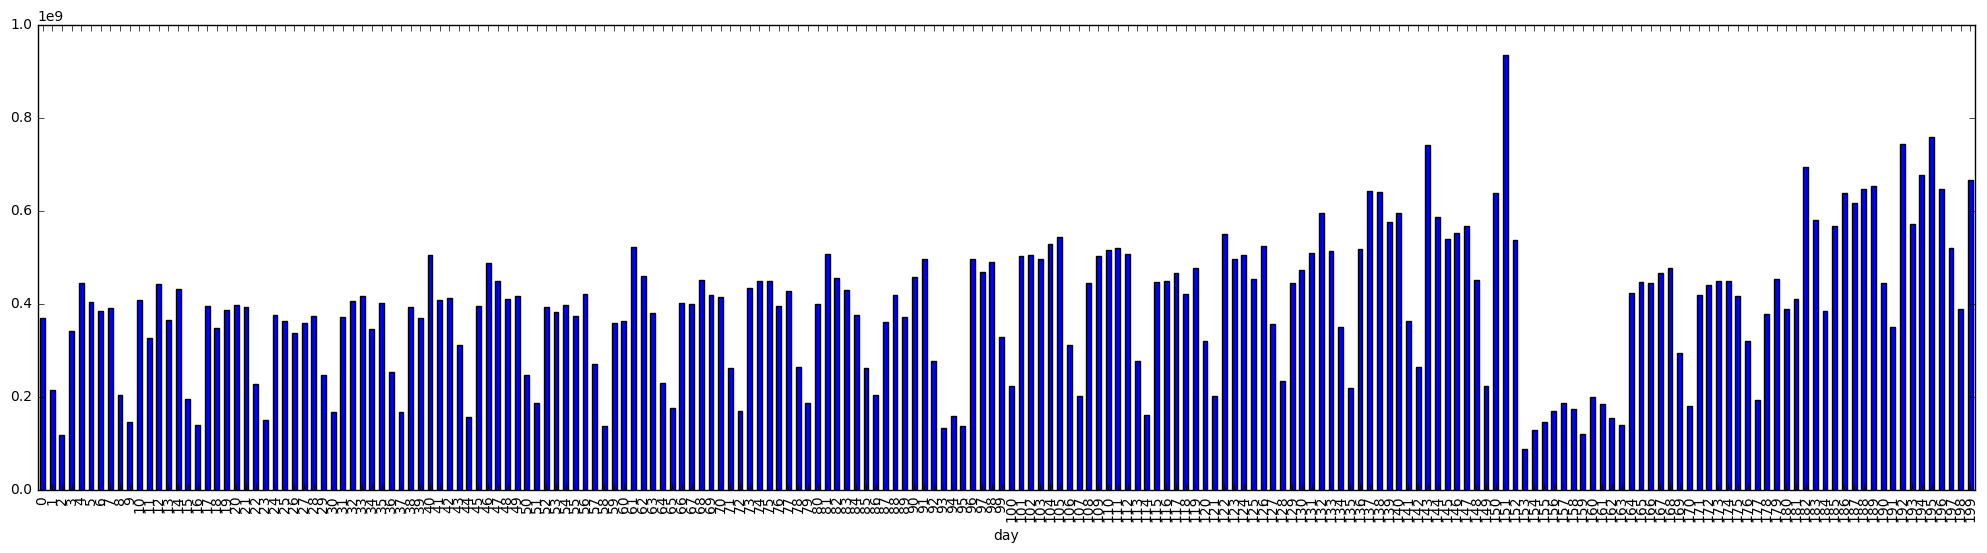

In [215]:
Z1 = transactions.groupby('day')['amount'].apply(lambda x: sum_pos(x))
pylab.figure(figsize=(25, 6))

Z1[:200].plot(kind = "bar")
plt.show()

### трэйн-тест сплит 

In [37]:
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(X_train, Y_train, 
                                                                                     test_size = 0.2)

In [115]:
cv = cross_validation.StratifiedShuffleSplit(train_labels, n_iter = 10, test_size = 0.2, random_state = 0)

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_data, train_labels)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

In [137]:
train_data.shape

(9600, 267)

## Линия

In [40]:
from sklearn import ensemble, linear_model
liner_regressor = linear_model.LogisticRegression()

In [41]:
liner_regressor.fit(train_data, train_labels)

/home/fartuk/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [42]:
reduced_train = liner_regressor.transform(train_data)

/home/fartuk/anaconda2/lib/python2.7/site-packages/sklearn/utils/__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


In [55]:
print(np.std(train_data, 0)*liner_regressor.coef_)

[[  6.86689656e-04   3.90999771e-01  -4.44654447e-01  -2.38366613e-01
    2.72033432e-01  -4.27825867e-02  -3.21262306e-02  -8.71701245e-03
   -2.79412730e-02   1.50876887e-02   7.54350017e-02   1.37835537e-01
    1.30569737e-01  -1.52091501e-01   6.00325007e-03  -7.82335555e-02
    1.66863320e-01   2.15893289e-02   1.20168785e-02  -5.75490344e-02
   -7.16246499e-02   1.04413610e-01  -3.60468594e-02   1.06388616e-02
   -1.72987161e-01   6.27296602e-02   6.45158112e-02  -2.48602788e-02
   -2.82027885e-02   2.09834182e-02  -4.79963326e-02   8.08730332e-02
   -8.54784204e-02  -2.36879495e-02   1.94296611e-02   7.13886719e-02
   -4.08875541e-02  -3.11750203e-02  -1.18212337e-01   1.06388616e-02
    5.23098611e-02  -1.03656997e-01  -2.48602788e-02  -4.01653269e-03
    1.51057218e-02  -3.26899021e-02  -3.61253202e-02   1.03736134e-01
    3.00148376e-02  -3.53200822e-02  -5.86306197e-02  -5.01428335e-02
   -1.51597685e-01   3.76048177e-02   3.62638881e-01  -1.62567388e-02
    2.07096594e-02  

In [43]:
liner_prediction = liner_regressor.predict_proba(test_data)

In [44]:
liner_prediction[:10]

array([[  9.96579898e-01,   3.42010174e-03],
       [  1.14689106e-04,   9.99885311e-01],
       [  2.24135875e-01,   7.75864125e-01],
       [  5.12557418e-01,   4.87442582e-01],
       [  8.21720106e-01,   1.78279894e-01],
       [  9.27024004e-01,   7.29759962e-02],
       [  3.61648569e-02,   9.63835143e-01],
       [  5.71788101e-01,   4.28211899e-01],
       [  5.58494780e-01,   4.41505220e-01],
       [  9.63691287e-01,   3.63087128e-02]])

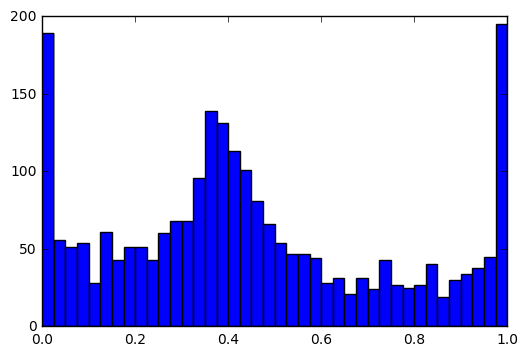

In [47]:
plt.hist(liner_prediction[:, 1], bins=40)
plt.show()

In [48]:
metrics.roc_auc_score(test_labels, liner_prediction[:,1])

0.84595055640141514

## Бустинг

In [50]:
import xgboost as xgb
from sklearn import cross_validation, datasets, grid_search, linear_model, metrics


In [51]:
cla = xgb.XGBClassifier(max_depth=10,
                        learning_rate=0.1,
                        n_estimators=300,
                        silent=True,
                        objective='binary:logistic',
                        nthread=-1,
                        gamma=0,
                        min_child_weight=10,
                        max_delta_step=0,
                        subsample=1,
                        colsample_bytree=1,
                        colsample_bylevel=1,
                        reg_alpha=0,
                        reg_lambda=1,
                        scale_pos_weight=1,
                        base_score=0.5,
                        seed=0,
                        missing=None)


In [52]:
cla.fit(train_data, train_labels)

/home/fartuk/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/label.py:108: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=10,
       min_child_weight=10, missing=None, n_estimators=300, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/fartuk/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


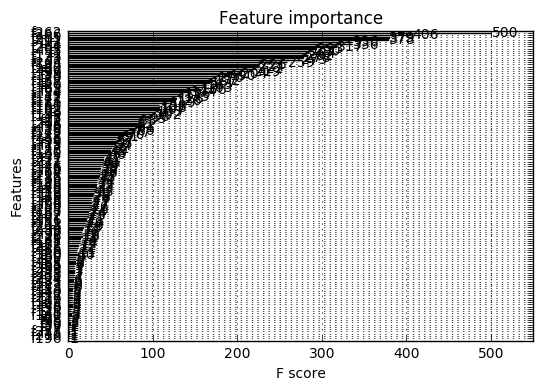

In [144]:
xgb.plot_importance(cla)
pyplot.show()

In [53]:
predict = cla.predict_proba(test_data)

In [54]:
predict[:10]

array([[ 0.99704659,  0.00295344],
       [ 0.00142479,  0.99857521],
       [ 0.01686621,  0.98313379],
       [ 0.06574857,  0.93425143],
       [ 0.8318907 ,  0.16810928],
       [ 0.99175298,  0.00824702],
       [ 0.1627    ,  0.8373    ],
       [ 0.90583152,  0.09416847],
       [ 0.91582656,  0.08417343],
       [ 0.94848925,  0.05151076]], dtype=float32)

In [138]:
metrics.roc_auc_score(test_labels, predict[:, 1])

0.87945743865030668

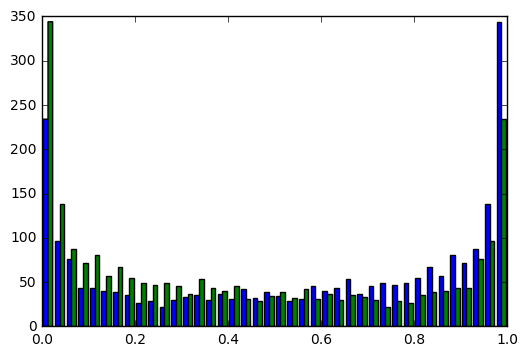

In [121]:
plt.hist(predict, bins=40)
plt.show()

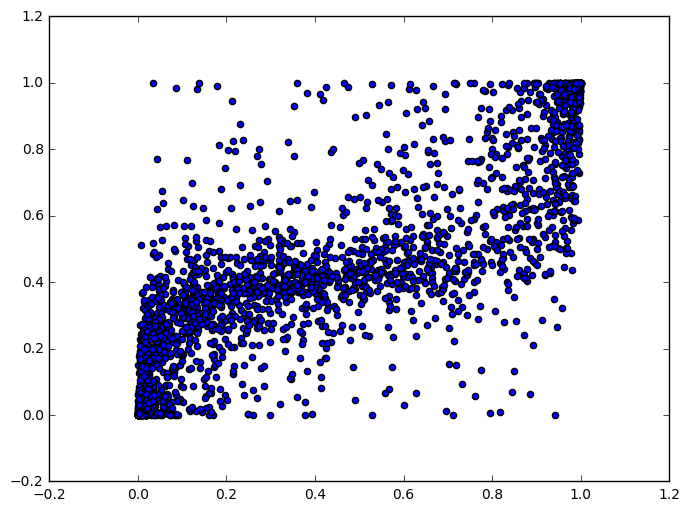

In [123]:
pylab.figure(figsize=(8, 6))
pylab.scatter( predict[:, 1], liner_prediction[:, 1])

## буст1

In [56]:
dtrain = xgb.DMatrix(data = train_data, label = train_labels)

In [129]:
param = {'max_depth':10,
         'eta':0.31,
         'silent':1,
         'objective':'binary:logistic',
         'min_child_weight': 8}
num_round = 40

In [130]:
bst = xgb.train(param, dtrain, num_round)

AttributeError: 'DMatrix' object has no attribute 'shape'

In [140]:
len(bst.get_fscore())

117

In [141]:
pred = bst.predict(xgb.DMatrix(data = test_data))

In [142]:
pred

array([ 0.00417055,  0.99531543,  0.90520948, ...,  0.35481772,
        0.90909737,  0.56612343], dtype=float32)

In [143]:
metrics.roc_auc_score(test_labels, pred)

0.87035854025793735

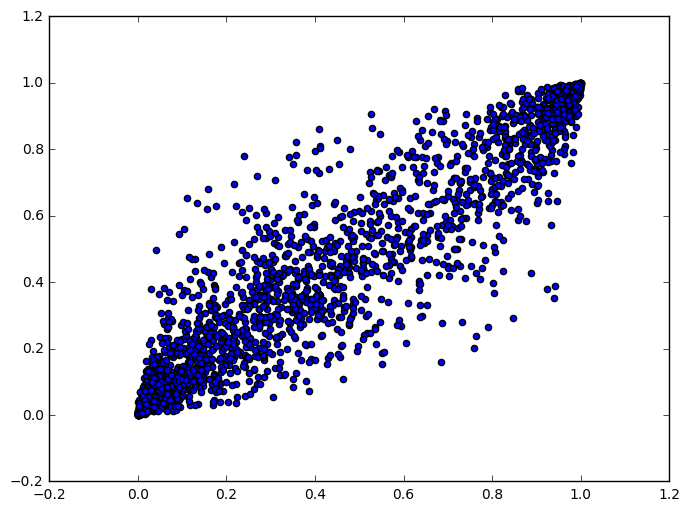

In [146]:
pylab.figure(figsize=(8, 6))
pylab.scatter( predict[:, 1], pred)

## лес

In [148]:
from sklearn.ensemble import RandomForestClassifier

In [149]:
forest_regressor = RandomForestClassifier(random_state = 0, max_depth = 30, n_estimators = 700)

In [150]:
forest_regressor.fit(train_data, train_labels)

/home/fartuk/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=30, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=700, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [151]:
X.columns.values

array([1000, 1010, 1030, 1100, 1110, 1200, 1210, 1310, 1410, 1510, 2000,
       2010, 2011, 2020, 2021, 2100, 2110, 2200, 2210, 2320, 2330, 2331,
       2340, 2341, 2370, 2371, 2440, 2446, 2456, 2460, 4010, 4011, 4020,
       4021, 4031, 4035, 4041, 4045, 4051, 4061, 4071, 4090, 4096, 4097,
       4100, 4110, 4200, 4210, 4500, 6000, 6010, 6100, 6110, 6200, 6210,
       7010, 7011, 7014, 7015, 7020, 7021, 7024, 7025, 7030, 7031, 7034,
       7035, 7040, 7041, 7044, 7070, 7071, 7074, 7075, 8100, 8145, 8146,
       742, 1711, 1731, 1799, 2741, 3000, 3351, 3501, 4111, 4112, 4121,
       4131, 4214, 4215, 4411, 4511, 4722, 4784, 4789, 4812, 4814, 4816,
       4829, 4899, 4900, 5013, 5039, 5044, 5045, 5047, 5065, 5072, 5074,
       5085, 5094, 5099, 5111, 5122, 5131, 5137, 5169, 5172, 5192, 5193,
       5199, 5200, 5211, 5231, 5251, 5261, 5300, 5309, 5310, 5311, 5331,
       5399, 5411, 5422, 5441, 5451, 5462, 5499, 5511, 5532, 5533, 5541,
       5542, 5571, 5599, 5611, 5621, 5631, 5641, 565

In [152]:
imp = pd.DataFrame(forest_regressor.feature_importances_)
imp.columns = ['sus']
names = pd.DataFrame(X.columns.values)
imp = pd.concat([imp, names],axis=1)
imp = imp.sort('sus', ascending = False)

/home/fartuk/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [153]:
imp.shape

(267, 2)

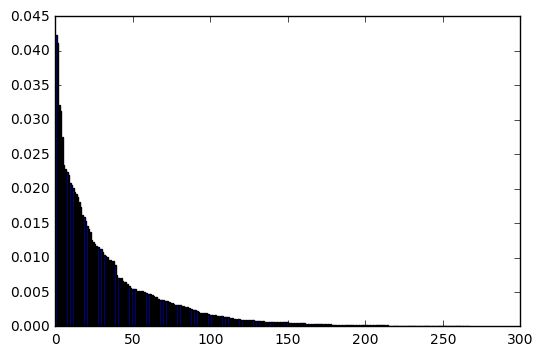

In [196]:
pyplot.bar(range(imp.shape[0]), imp.ix[:, 0])
pyplot.show()

In [108]:
train_data1 = pd.DataFrame(train_data)

In [111]:
train_data1.columns.values

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [154]:
forest_prediction = forest_regressor.predict_proba(test_data)

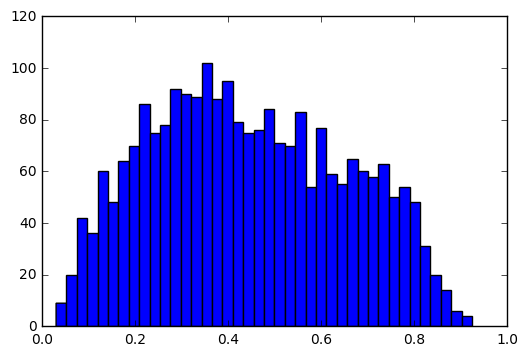

In [155]:
plt.hist(forest_prediction[:, 1], bins=40)
plt.show()

In [165]:
t = 0.45
metrics.roc_auc_score(test_labels, forest_prediction[:,1]*t + pred*(1-t))

0.8752574895884645

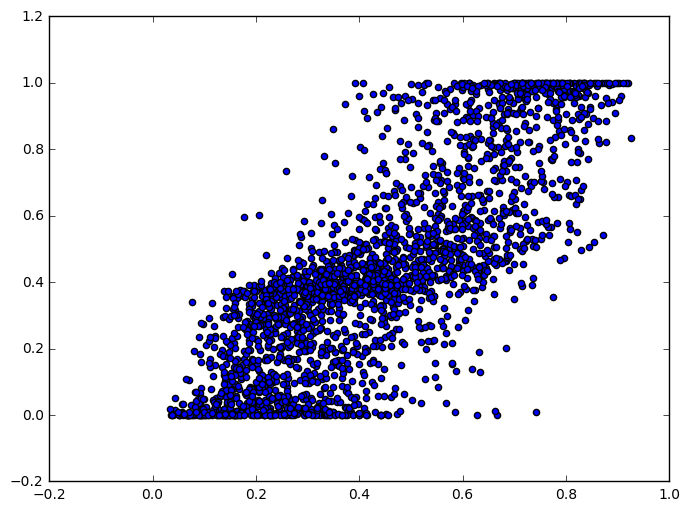

In [78]:
pylab.figure(figsize=(8, 6))
pylab.scatter(forest_prediction[:, 1], liner_prediction[:, 1])

## итог

In [167]:
X_test1 = X.drop(customers_gender.index)
result = pd.DataFrame(X_test1.index, columns=['customer_id'])
X_test1 = scaler.transform(X_test1)
X_test1[:4]


array([[ -3.64488272e-02,  -6.66473878e-01,  -5.40133996e-01, ...,
          3.02444493e-01,  -1.61145376e-01,   4.04737203e-04],
       [ -3.64488272e-02,   1.61894078e+00,  -4.42142930e-01, ...,
          1.89996543e-01,  -2.90811987e-01,   3.28575110e-01],
       [ -3.64488272e-02,  -5.88642419e-01,  -5.75767111e-01, ...,
          4.16622411e-01,  -5.27705413e-01,   2.41424989e-01],
       [ -3.64488272e-02,  -7.30154162e-01,   1.81436584e-01, ...,
          4.29492205e-02,   7.64866519e-02,  -2.66083493e-01]])

In [174]:
predict_boo = forest_regressor.predict_proba(X_test1)[:, 1] * 0.0 + (1-0.0)* bst.predict(xgb.DMatrix(data = X_test1))

In [175]:
result['gender'] = predict_boo

In [176]:
result[:5]

,customer_id,gender
0,49101,0.454021
1,114348,0.949586
2,127946,0.750096
3,137367,0.822785
4,174467,0.674067


In [177]:
result.to_csv('b_a.csv', index=False)